In [4]:
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 19.9 MB/s eta 0:00:0000:0100:01


In [36]:
# Stage 1: Data Loading & Initial Inspection
import os
os.getcwd()

os.chdir("/Users/mc/segmentation-uplift-retention-2025")

#read CSV
import pandas as pd

df = pd.read_csv("data/raw/ecommerce_clickstream_transactions.csv")
df.head()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


# EDA STEP


In [ ]:
# Check number of list 
df.shape  

(74817, 7)

In [ ]:
# Display column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
# Count missing values in each column
df.isnull().sum()

UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64

In [20]:
# Display the number of unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

UserID: 1000 unique values
SessionID: 10 unique values
Timestamp: 74817 unique values
EventType: 7 unique values
ProductID: 8747 unique values
Amount: 10682 unique values
Outcome: 1 unique values



# Stage 2: Data Cleaning & Preparation

In [38]:
# 1. Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
# Check conversion result
print(df['Timestamp'].head())

0   2024-07-07 18:00:26.959902
1   2024-03-05 22:01:00.072000
2   2024-03-23 22:08:10.568453
3   2024-03-12 00:32:05.495638
4   2024-02-25 22:43:01.318876
Name: Timestamp, dtype: datetime64[ns]


In [39]:
# Extract additional time-based features
df['Date'] = df['Timestamp'].dt.date
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

print("✅ Timestamp converted and time features extracted.")

✅ Timestamp converted and time features extracted.


In [40]:
# 2. Explore EventType unique values
print("\nUnique Event Types:")
print(df['EventType'].unique())

print("\nEventType counts:")
print(df['EventType'].value_counts())


Unique Event Types:
['page_view' 'product_view' 'add_to_cart' 'login' 'click' 'logout'
 'purchase']

EventType counts:
EventType
page_view       10819
add_to_cart     10735
product_view    10696
logout          10685
purchase        10682
click           10632
login           10568
Name: count, dtype: int64


In [41]:

#3. Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
Date             0
Year             0
Month            0
Day              0
Hour             0
DayOfWeek        0
dtype: int64


In [42]:
# 4. Handle missing values (Example: fill or drop)
df['ProductID'] = df['ProductID'].fillna('unknown')  # Fill missing ProductID with 'unknown'
df['Amount'] = df['Amount'].fillna(0)               # Fill missing Amount with 0
df['Outcome'] = df['Outcome'].fillna('none')        # Fill missing Outcome with 'none'

print("\n✅ Missing values handled.")


✅ Missing values handled.


In [45]:
# 5. Remove invalid timestamps (if any)
df = df[df['Timestamp'].notnull()]  # Remove rows without timestamp
# Example: remove future dates beyond today
from datetime import datetime
today = datetime.today()
df = df[df['Timestamp'] <= today]

print("\n✅ Invalid timestamps removed.")


✅ Invalid timestamps removed.


In [46]:
# 6. Final check after cleaning
print("\nData after cleaning:")
print(df.info())
print(df.head())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserID     74817 non-null  int64         
 1   SessionID  74817 non-null  int64         
 2   Timestamp  74817 non-null  datetime64[ns]
 3   EventType  74817 non-null  object        
 4   ProductID  74817 non-null  object        
 5   Amount     74817 non-null  float64       
 6   Outcome    74817 non-null  object        
 7   Date       74817 non-null  object        
 8   Year       74817 non-null  int32         
 9   Month      74817 non-null  int32         
 10  Day        74817 non-null  int32         
 11  Hour       74817 non-null  int32         
 12  DayOfWeek  74817 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(5)
memory usage: 6.3+ MB
None
   UserID  SessionID                  Timestamp     EventType  Produ

# Stage 3: Exploratory Data Analysis (EDA)

In [48]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.5 MB/s eta 0:00:00a 0:00:01


In [49]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid", palette="muted")

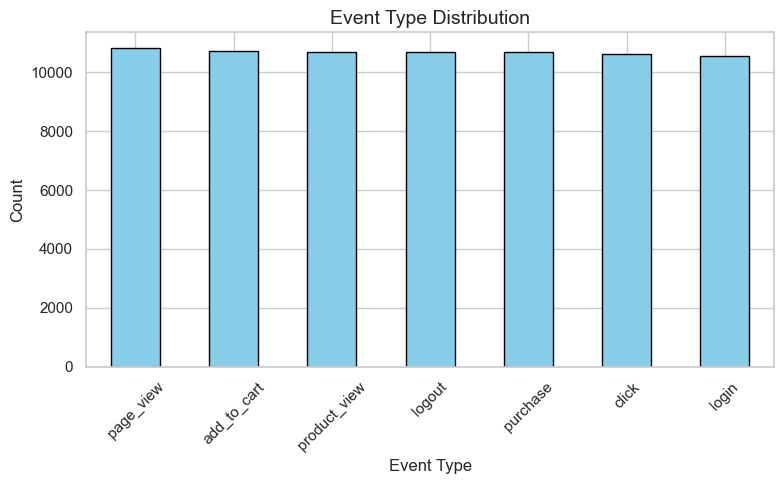

In [52]:
# 1. Event Type Distribution
plt.figure(figsize=(8, 5))
df['EventType'].value_counts().plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black'
)
plt.title('Event Type Distribution', fontsize=14)
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

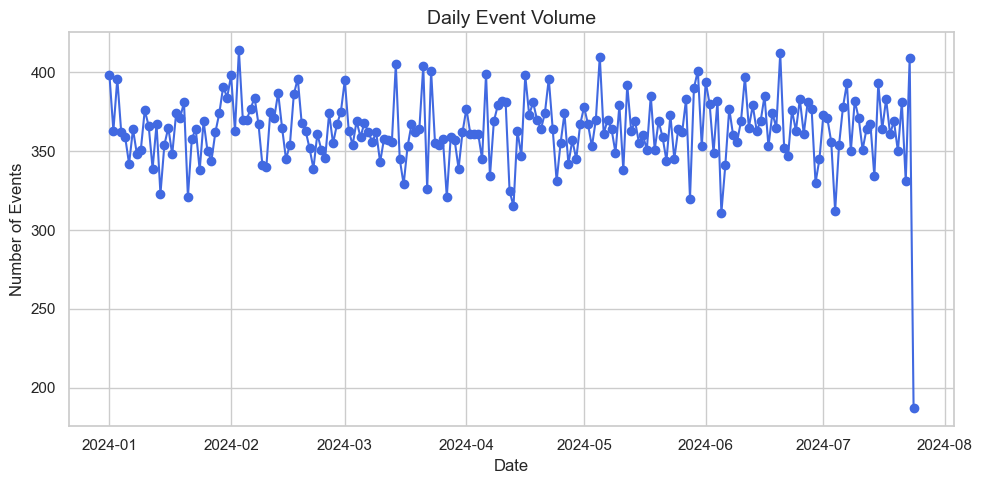

In [53]:
# 2. Transactions Over Time (Daily)
daily_events = df.groupby('Date').size()
plt.figure(figsize=(10, 5))
daily_events.plot(
    kind='line', 
    marker='o', 
    color='royalblue')
plt.title('Daily Event Volume', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()


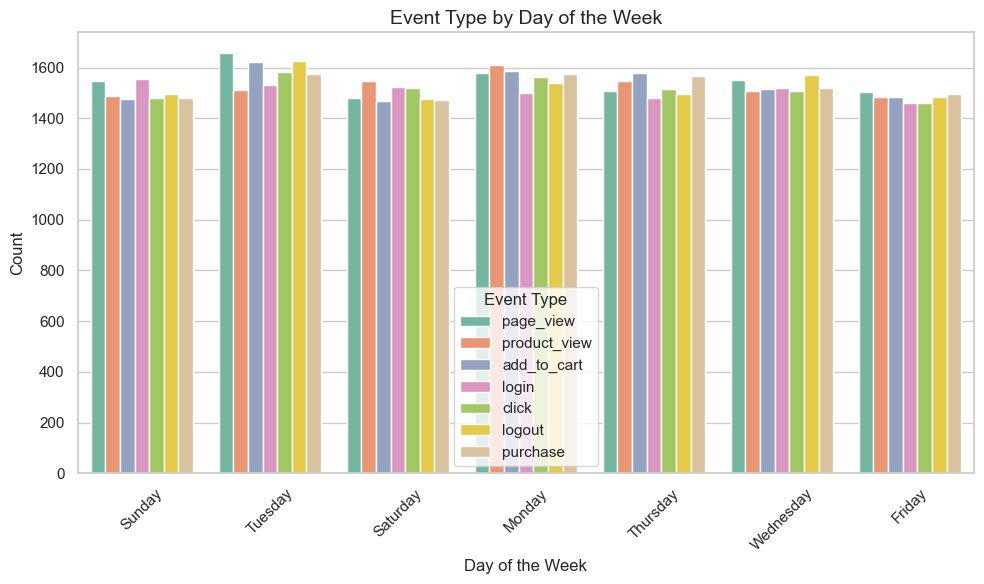

In [54]:
# 3. Event Type by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    x='DayOfWeek', 
    hue='EventType', 
    palette='Set2')
plt.title('Event Type by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

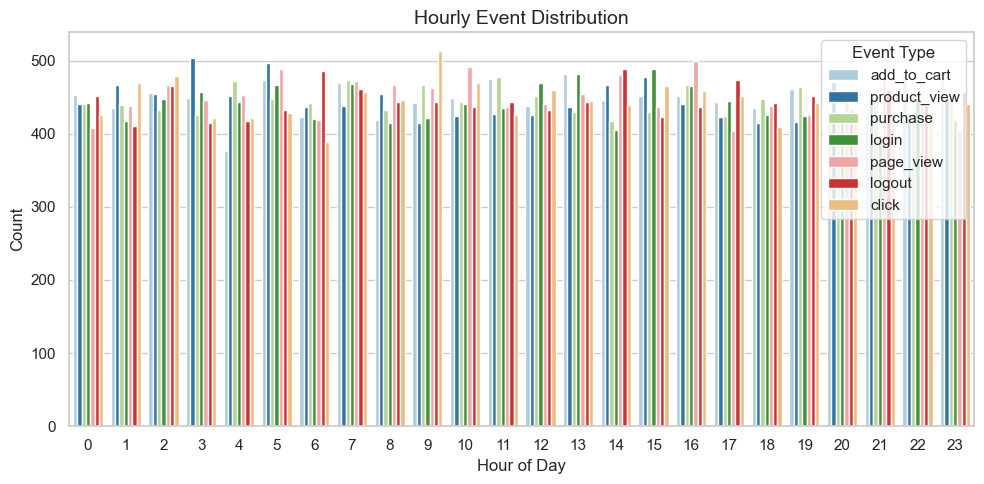

In [55]:
# 4. Hourly Distribution of Events
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='Hour', 
    hue='EventType', 
    palette='Paired')
plt.title('Hourly Event Distribution', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

In [56]:
# 5. Save cleaned dataset for Tableau
df.to_csv("data/processed/ecommerce_clickstream_cleaned.csv", index=False)
print("✅ Cleaned dataset saved to data/processed/ecommerce_clickstream_cleaned.csv")

✅ Cleaned dataset saved to data/processed/ecommerce_clickstream_cleaned.csv


# Stage 4.1: Funnel Analysis
This analysis measures the conversion rates between different stages in the purchase funnel.

In [62]:
# Define the funnel steps
funnel_steps = ['page_view', 'product_view', 'add_to_cart', 'purchase']
# Count unique users for each step
funnel_counts = []
for step in funnel_steps:
    users = df[df['EventType'] == step]['UserID'].nunique()
    funnel_counts.append(users)
# Create a DataFrame for funnel data
funnel_df = pd.DataFrame({
    'Step': funnel_steps,
    'UniqueUsers': funnel_counts
})
# Calculate conversion rates
funnel_df['ConversionRate'] = funnel_df['UniqueUsers'] / funnel_df['UniqueUsers'].iloc[0] * 100
# Display funnel table
print(funnel_df)

           Step  UniqueUsers  ConversionRate
0     page_view         1000           100.0
1  product_view         1000           100.0
2   add_to_cart         1000           100.0
3      purchase         1000           100.0


/var/folders/24/7_kb_1q51rqcx10st1k3wfsh0000gn/T/ipykernel_41116/1952248855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel_df, x='Step', y='ConversionRate', palette='Blues_d', edgecolor='black')


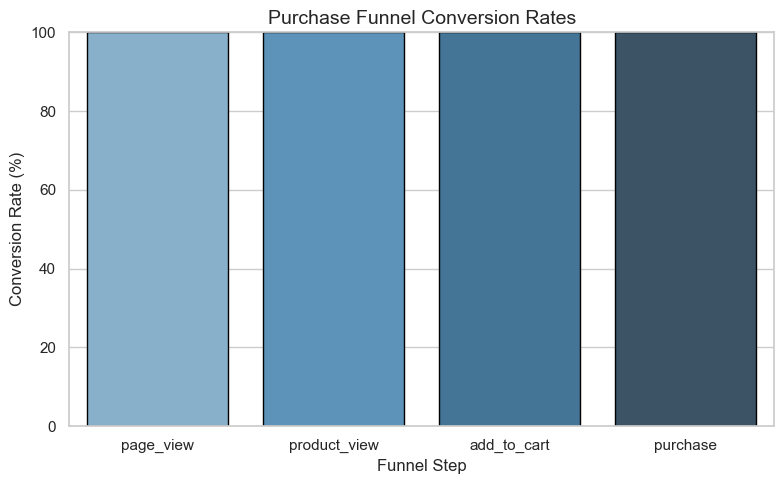

In [63]:
# Visualize funnel
plt.figure(figsize=(8, 5))
sns.barplot(data=funnel_df, x='Step', y='ConversionRate', palette='Blues_d', edgecolor='black')
plt.title('Purchase Funnel Conversion Rates', fontsize=14)
plt.xlabel('Funnel Step')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Stage 4.2: User Activity Analysis

Calculate Daily Active Users (DAU), Weekly Active Users (WAU), and Monthly Active Users (MAU)

In [65]:
# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Daily Active Users
dau = df.groupby(df['Timestamp'].dt.date)['UserID'].nunique()

# Weekly Active Users
wau = df.groupby(df['Timestamp'].dt.isocalendar().week)['UserID'].nunique()

# Monthly Active Users
mau = df.groupby(df['Timestamp'].dt.month)['UserID'].nunique()

# Print activity metrics
print("\nDaily Active Users (DAU):")
print(dau.head())

print("\nWeekly Active Users (WAU):")
print(wau.head())

print("\nMonthly Active Users (MAU):")
print(mau.head())


Daily Active Users (DAU):
Timestamp
2024-01-01    329
2024-01-02    306
2024-01-03    332
2024-01-04    298
2024-01-05    304
Name: UserID, dtype: int64

Weekly Active Users (WAU):
week
1    928
2    911
3    918
4    916
5    936
Name: UserID, dtype: int64

Monthly Active Users (MAU):
Timestamp
1    1000
2    1000
3    1000
4    1000
5    1000
Name: UserID, dtype: int64


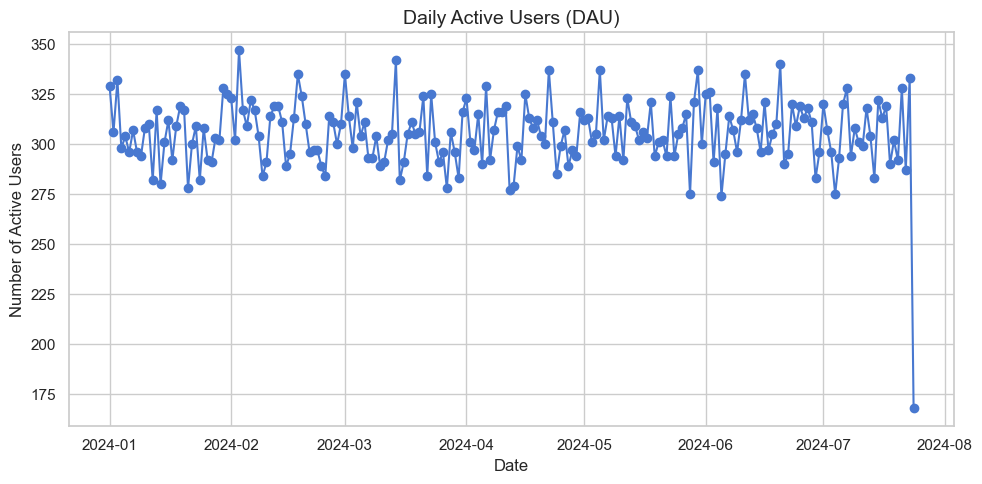

In [66]:
# Visualize DAU trend
plt.figure(figsize=(10, 5))
dau.plot(kind='line', marker='o')
plt.title('Daily Active Users (DAU)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.grid(True)
plt.tight_layout()
plt.show()

# Stage 5: Retention Analysis

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Step 1: Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 2: Extract the date only (without time)
df['date'] = df['Timestamp'].dt.date

# Step 3: Get the first date each user appeared in the dataset
first_visit = df.groupby('UserID')['date'].min().reset_index()
first_visit.rename(columns={'date': 'first_visit_date'}, inplace=True)

# Step 4: Merge first visit date back to the main dataframe
# Use suffixes to avoid column name duplication
df = df.merge(first_visit, on='UserID', how='left', suffixes=('', '_first'))

# Step 5: Calculate the number of days since the first visit
df['days_since_first'] = (
    pd.to_datetime(df['date']) - pd.to_datetime(df['first_visit_date'])
).dt.days

# Step 6: Create a retention table
# The retention table counts how many unique users return on each day since first visit
retention_table = df.groupby(['first_visit_date', 'days_since_first'])['UserID'].nunique().unstack(fill_value=0)

# Step 7: Calculate retention rate by dividing by Day 0 user count
retention_rate = retention_table.divide(retention_table[0], axis=0) * 100


In [82]:
# 8. Display the retention rate table
print("Retention Rate Table (%):")
print(retention_rate)

Retention Rate Table (%):
days_since_first    0           1           2           3           4    \
first_visit_date                                                          
2024-01-01        100.0   30.699088   31.306991   34.650456   28.875380   
2024-01-02        100.0   31.219512   25.365854   24.390244   30.731707   
2024-01-03        100.0   28.484848   30.303030   31.515152   29.090909   
2024-01-04        100.0   23.529412   29.411765   35.294118   35.294118   
2024-01-05        100.0   24.719101   29.213483   30.337079   22.471910   
2024-01-06        100.0   25.714286   22.857143   34.285714   17.142857   
2024-01-07        100.0   35.000000   25.000000   35.000000   25.000000   
2024-01-08        100.0   44.444444   33.333333   29.629630   25.925926   
2024-01-09        100.0   26.666667   20.000000   40.000000   20.000000   
2024-01-10        100.0   66.666667   11.111111   66.666667   11.111111   
2024-01-11        100.0   20.000000   40.000000   40.000000   20.000000   

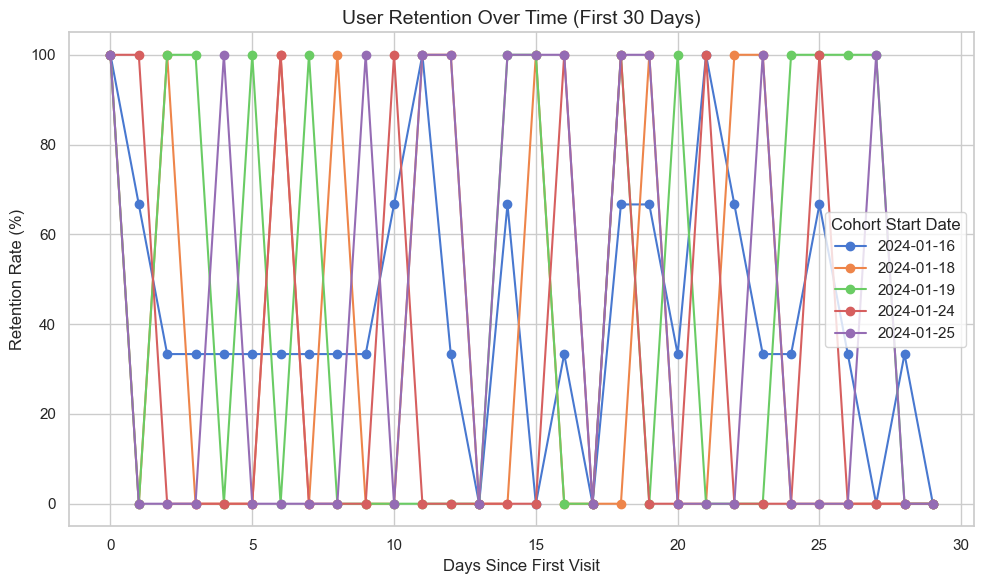

In [95]:
## Step 9 + Step 10 
retention_rate_limited = retention_rate.iloc[:, :30]

plt.figure(figsize=(10, 6))
for cohort_date in retention_rate_limited.index[-5:]:
    plt.plot(
        retention_rate_limited.columns,
        retention_rate_limited.loc[cohort_date],
        marker='o',
        label=str(cohort_date)  # 这里有 label 才能显示 legend
    )

# Chart formatting
plt.title('User Retention Over Time (First 30 Days)', fontsize=14)
plt.xlabel('Days Since First Visit')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.legend(title='Cohort Start Date')
plt.tight_layout()
plt.show()


In [96]:
# Step 11. Summary Table (Retention at Day 1, 7, 30)
summary_days = [1, 7, 29]  # 注意列是从0开始，第30天是 index=29
summary_table = retention_rate.iloc[:, summary_days]
summary_table.columns = ['Day 1', 'Day 7', 'Day 30']
print("Retention Summary Table (%):")
print(summary_table)

Retention Summary Table (%):
                       Day 1       Day 7     Day 30
first_visit_date                                   
2024-01-01         30.699088   28.267477  35.562310
2024-01-02         31.219512   38.536585  31.219512
2024-01-03         28.484848   26.060606  33.333333
2024-01-04         23.529412   32.941176  31.764706
2024-01-05         24.719101   35.955056  30.337079
2024-01-06         25.714286   31.428571  42.857143
2024-01-07         35.000000   25.000000  30.000000
2024-01-08         44.444444   33.333333  37.037037
2024-01-09         26.666667   60.000000  40.000000
2024-01-10         66.666667   33.333333  55.555556
2024-01-11         20.000000   40.000000   0.000000
2024-01-12         33.333333    0.000000  33.333333
2024-01-13          0.000000   33.333333  33.333333
2024-01-14          0.000000  100.000000   0.000000
2024-01-15         50.000000  100.000000  50.000000
2024-01-16         66.666667   33.333333   0.000000
2024-01-18          0.000000    0.0

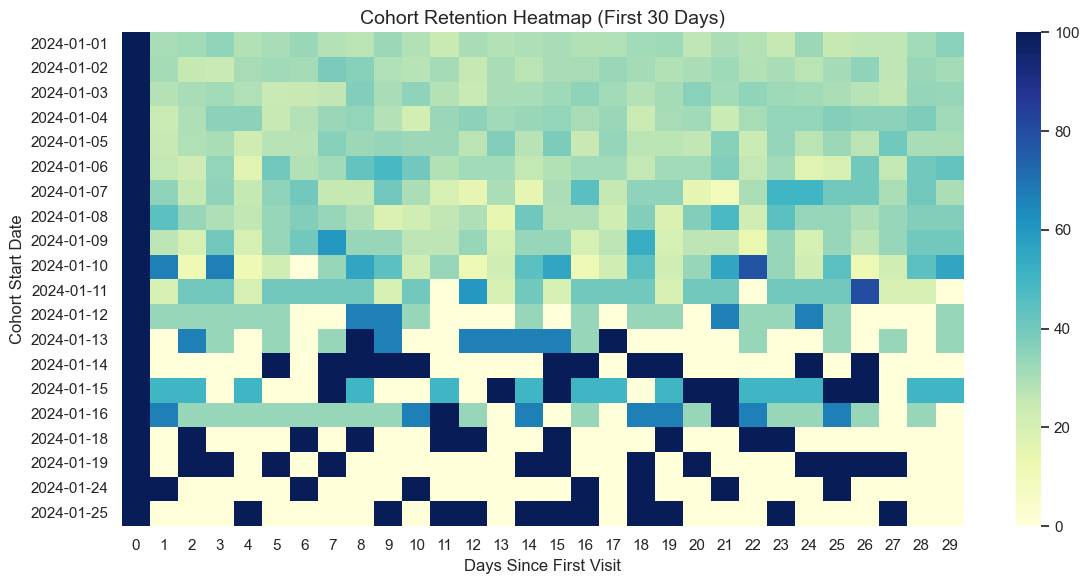

In [97]:
# Step 12. Retention Heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_rate.iloc[:, :30],  # 限制到前30天
    annot=False, 
    fmt=".1f", 
    cmap="YlGnBu"
)
plt.title('Cohort Retention Heatmap (First 30 Days)', fontsize=14)
plt.xlabel('Days Since First Visit')
plt.ylabel('Cohort Start Date')
plt.tight_layout()
plt.show()

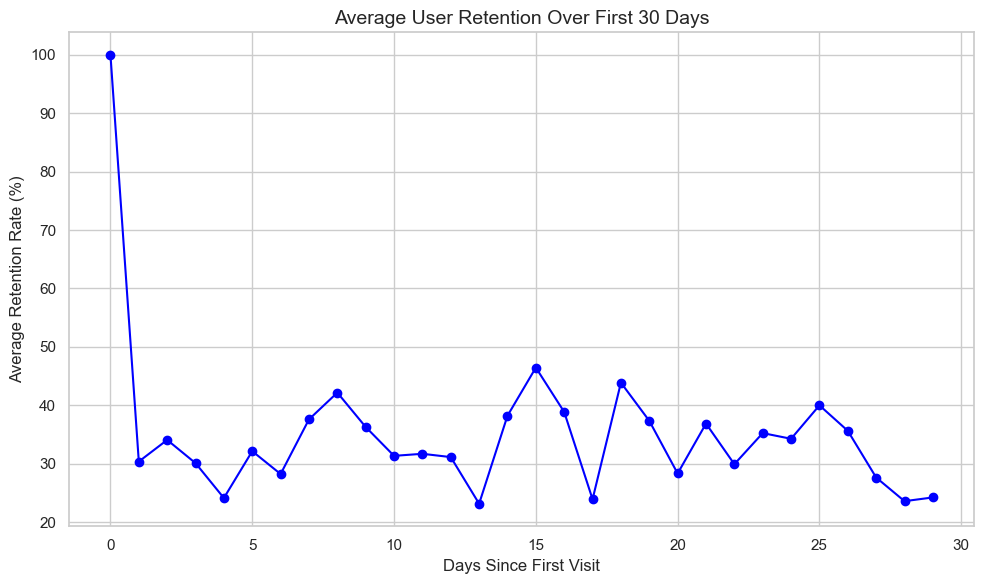

In [98]:
# Step 13. Average Retention Curve (across cohorts)
avg_retention = retention_rate.iloc[:, :30].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_retention.index, avg_retention.values, marker='o', color='blue')
plt.title('Average User Retention Over First 30 Days', fontsize=14)
plt.xlabel('Days Since First Visit')
plt.ylabel('Average Retention Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 14: Insights & Key Findings

1. **Initial Retention Drop**  
   - Across all cohorts, retention drops sharply after Day 1, with an average decrease of around **60–70%** by Day 2.  
   - This suggests that many new users do not return after their first visit.

2. **Mid-Term Retention Patterns (Day 7)**  
   - Retention stabilizes between **25–40%** after the first week.  
   - Cohorts starting around mid-January (e.g., 2024-01-16) show relatively higher Day 7 retention, indicating potential impact from product changes, campaigns, or seasonality.

3. **Long-Term Retention (Day 30)**  
   - By Day 30, most cohorts maintain a **20–35%** retention rate.  
   - A few cohorts drop to nearly zero, which could be linked to user acquisition channels or onboarding experience.

4. **Cohort Heatmap Insights**  
   - Higher retention rates are observed for cohorts starting around early to mid-January.  
   - Cohorts in late January show more volatility, possibly due to changes in traffic sources or reduced engagement campaigns.

---

## Step 15: Recommendations

1. **Improve Onboarding Experience**  
   - Focus on the first-day experience to encourage users to return.  
   - Consider personalized onboarding, in-app tips, or guided product tours.

2. **Early Engagement Campaigns**  
   - Implement targeted campaigns (email, push notifications) within the first 3 days after signup to boost early retention.

3. **Analyze High-Performing Cohorts**  
   - Investigate why cohorts like **2024-01-16** and **2024-01-10** perform better at Day 7 and Day 30.  
   - Identify the acquisition channels, user segments, or product changes during these periods.

4. **Reactivation Strategies**  
   - For users who drop off after Day 1 or Day 7, test win-back strategies such as discounts, feature highlights, or reminders.

5. **Continuous Tracking**  
   - Set up automated retention tracking dashboards to monitor cohort performance over time and quickly identify drops.

---


In [100]:
# ==============================
# Export Results to CSV
# ==============================

# 1. Export Summary Table (Retention at Day 1, 7, 30)
summary_days = [1, 7, 29]  # Note: index starts from 0, so Day 30 is index=29
summary_table = retention_rate.iloc[:, summary_days]
summary_table.columns = ['Day 1', 'Day 7', 'Day 30']

summary_table.to_csv('retention_summary_table.csv')
print("Retention Summary Table saved as 'retention_summary_table.csv'.")


Retention Summary Table saved as 'retention_summary_table.csv'.


In [102]:
 #2. Export Full Retention Table (First 30 Days)
retention_rate_first_30 = retention_rate.iloc[:, :30]
retention_rate_first_30.to_csv('retention_rate_first_30_days.csv')
print("Full Retention Table (first 30 days) saved as 'retention_rate_first_30_days.csv'.")


Full Retention Table (first 30 days) saved as 'retention_rate_first_30_days.csv'.
